# pythia-action-order

Analyze behavior of Pythia when we re-order the action set.

**TODO**: Re-evaluate with action fallback always falling back to +1, instead of
whatever is at the front of the action list.

In [13]:
from importlib import reload
from matplotlib import colormaps
from matplotlib import pyplot as plt
from utils import plots, stats, tables, utils

In [14]:
# Knobs
base_dir = '/u/cmolder/GitHub/ChampSim/out/cygnus/'
suites = [('action_ordering', 'weighted')]
metrics  = ['ipc_improvement']
features = [{'Delta_Path', 'PC_Delta'}]
dpi = 192

# Plots (suites)

In [15]:
reload(utils)
dfs = {
    # ===
    # ===== Dynamic degree =====
    # ===
    # +1 first
    'degreedyn/pythia/bwaware3': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/pythia/bwaware3.csv', features),

    # +3 first
    'degreedyn/pythia/bwaware3_actionordering/3first': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/pythia/bwaware3_actionordering/3first.csv', features),

    # +4 first
    'degreedyn/pythia/bwaware3_actionordering/4first': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/pythia/bwaware3_actionordering/4first.csv', features),

    # +5 first
    'degreedyn/pythia/bwaware3_actionordering/5first': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/pythia/bwaware3_actionordering/5first.csv', features),
}

## 1-core, dynamic degree

In [16]:
pythia_feature = 'Delta_Path, PC_Delta'
degreedyn_1core_config = 'bwaware3'

degreedyn_1core_df = {
    '+1 first': dfs[f'degreedyn/pythia/{degreedyn_1core_config}'][pythia_feature],
    '+3 first': dfs[f'degreedyn/pythia/{degreedyn_1core_config}_actionordering/3first'][pythia_feature],
    '+4 first': dfs[f'degreedyn/pythia/{degreedyn_1core_config}_actionordering/4first'][pythia_feature],
    '+5 first': dfs[f'degreedyn/pythia/{degreedyn_1core_config}_actionordering/5first'][pythia_feature],
}

degreedyn_1core_colors = {
    '+1 first': colormaps['viridis'](0.1),
    '+3 first': colormaps['viridis'](0.36),
    '+4 first': colormaps['viridis'](0.63),
    '+5 first': colormaps['viridis'](0.9),
}

degreedyn_1core_hatches = {
    '+1 first': '',
    '+3 first': '',
    '+4 first': '',
    '+5 first': '',
}

degreedyn_1core_legend_kwargs = {
    'ncol': 4,
    'fontsize': 8,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

degreedyn_1core_label_kwargs = {
    'rotation': 0,
    'fontsize': 7,
    'ha': 'center',
}

=== action_ordering weighted ===


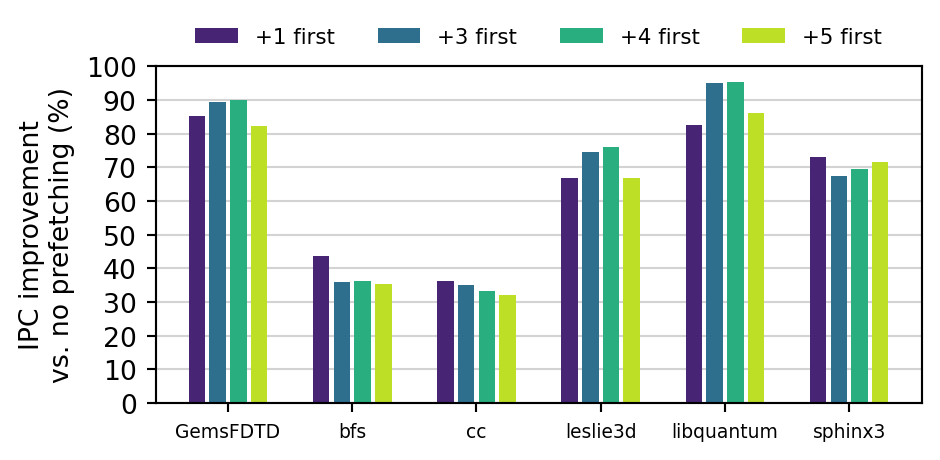

In [17]:
from importlib import reload
reload(utils)
reload(plots)
plots.plot_everything(degreedyn_1core_df, suites=suites, metrics=metrics, add_mean=False,
                      colors=degreedyn_1core_colors,
                      hatches=degreedyn_1core_hatches,
                      legend_kwargs=degreedyn_1core_legend_kwargs,
                      label_kwargs=degreedyn_1core_label_kwargs,
                      add_suptitle=False,
                      add_xlabel=False,
                      ylabel='IPC improvement\nvs. no prefetching (%)',
                      dpi=192, figsize=(5, 2.5),)
plt.savefig('../../cvs/papers/micro-23r/figures/pythia_action_ordering.pdf')

# Tables

## 1-core, dynamic degree

In [18]:
reload(tables)
tables.table_everything(degreedyn_1core_df, suites=suites, metrics=metrics)

=== action_ordering weighted ===
ipc_improvement


,+1 first,+3 first,+4 first,+5 first
run_name,,,,
GemsFDTD_weighted,85.386640,89.395715,89.947100,82.433820
bfs,43.590210,35.946112,36.325832,35.326386
cc,36.333608,35.227298,33.215606,31.965531
leslie3d_weighted,66.927458,74.662437,76.045158,66.893941
libquantum_weighted,82.715361,95.072895,95.314077,86.202104
sphinx3_weighted,73.170766,67.535405,69.663648,71.521141
mean,63.592705,64.582653,64.924582,60.921915


In [ ]:
tables.table_metric_all(degreedyn_1core_df, suites=suites, metric='ipc_improvement')

In [ ]:
reload(tables)
tables.gen_table_metric(degreedyn_1core_df, suite=suites[0][0], phase=suites[0][1], metric='ipc_improvement', add_mean=False)